Shape: (70000, 784)    Shape output: (70000, 1)


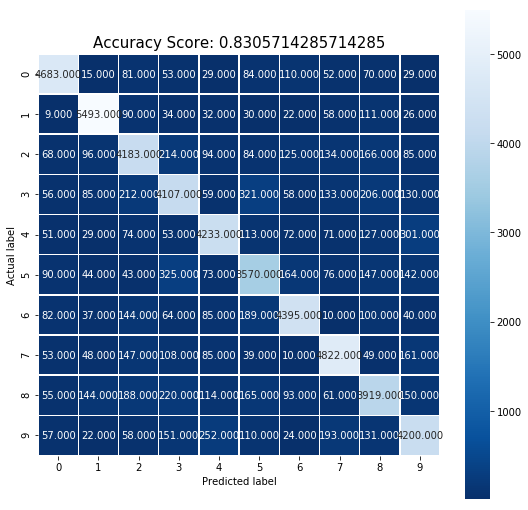

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

%matplotlib inline

# Import two files as dataframe
df_input = pd.read_csv("data/mnist_data.csv", header=None).iloc[:,1:]
df_output = pd.read_csv("data/mnist_target.csv", header=None).iloc[:,1:]

print("Shape:", df_input.shape, "   Shape output:", df_output.shape)

#Notice: test_size=0.75 is not a good value. test_size should be around 0.3
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, random_state=1, test_size=0.75)
X_train.shape

#Build the decision tree and train it with the training set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Make a prediction with the trained model on the test set
y_pred = dt.predict(X_test)

#Calculate the accuracy score 
score = dt.score(X_test, y_test)
#print the confusion matrix and compare predicted data with actual data
cm = metrics.confusion_matrix(y_test, y_pred)

#Plot the results in a confusion metrics with the accuracy score
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [2]:
clf = MLPClassifier()
clf #These parameters are used as default

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

/usr/local/anaconda3/envs/aiss_py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/envs/aiss_py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/envs/aiss_py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/anaconda3/envs/aiss_py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:91

/usr/local/anaconda3/envs/aiss_py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/anaconda3/envs/aiss_py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/envs/aiss_py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/anaconda3/envs/aiss_py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A colu

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


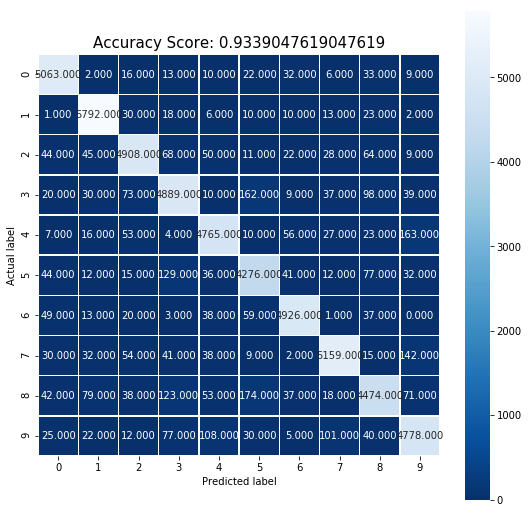

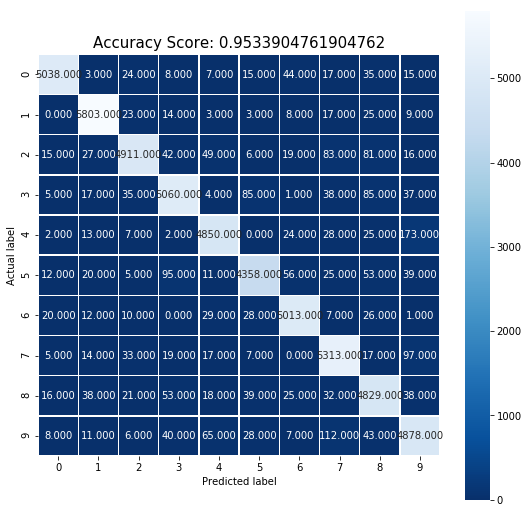

In [3]:
# train the MLPClassifier with the training data
clf.fit(X_train, y_train)

# Make a prediction with the trained model on the test data
y_pred = clf.predict(X_test)

#Calculate the accuracy score 
score = clf.score(X_test, y_test)
#print the confusion matrix and compare predicted data with actual data
cm = metrics.confusion_matrix(y_test, y_pred)

#Plot the results in a confusion metrics with the accuracy score
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Train MLPClassifier with Grid search
param_grid = {'activation': ['relu', 'tanh'],
              'hidden_layer_sizes': [(100,),(150,)],
                'solver': ['sgd', 'adam'],}
clf = GridSearchCV(MLPClassifier(), param_grid, cv = 3)
clf = clf.fit(X_train, y_train)

# Best estimator found by grid search
print(clf.best_estimator_)

y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);